<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT19/blob/bozzato/Lab-4/bozzato_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Approximation**
**Bozzato Federico**

# **Abstract**

Short summary of the lab report. State the objectives, methods used, main results and conlusions. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import numpy as np
from numpy import linalg as lalg

from matplotlib import tri
import matplotlib.pyplot as plt

# **Introduction**

Give a short description of the problem investigated in the report, and provide some background information so that the reader can understand the context. 

Briefly describe what method you have chosen to solve the problem, and justify why you selected that method. 

Here you can express mathematics through Latex syntax, and use hyperlinks for references.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/7500)

$
{\displaystyle \frac{\partial u}{\partial t}} + u\cdot \nabla u +\nabla p = f, \quad \nabla \cdot u=0$



# **Methods**

Describe the methods you used to solve the problem. This may be a combination of text, mathematical formulas (Latex), algorithms (code), data and output.  

## Mandatory assignment

###1. Function: 1-point Gauss quadrature over a unit interval

Input: function f(x) 

Output: quadrature approximation of integral int_0^1 f(x) dx

Test: verify exact integration of linear polynomial ax + b

In [0]:
def quadRInter(fun):
  return fun(0.5)
  
  


###2. Function: L2 projection to pw linear approximation over mesh in 1D

Input: function f(x), 1D mesh with nodes (x0,...,xn)

Output: vector of L2 projection of f(x) evaluated in (x0,...,xn) 

Test: verify accuracy and convergence rate against exact solution

In [0]:
#https://webcache.googleusercontent.com/search?q=cache:EHkiNa0GYqUJ:https://www.springer.com/cda/content/document/cda_downloaddocument/9783642332869-c1.pdf
#  ...      %3FSGWID%3D0-0-45-1368510-p174611366+&cd=10&hl=it&ct=clnk&gl=se


def basis1D(mesh):
  def localLagrangeBasis(x0,x1,index):
    t= 0
    if index == 0:
      m= -1/(x1-x0)
      q= x1/(x1-x0)
      t= (m,q) 
    elif index == 1:
      m= 1/(x1-x0)
      q= -x0/(x1-x0)
      t= (m,q)
    
    return t  
  
  phi = []
  for i in range(0,len(mesh)-1):
    t0= localLagrangeBasis(mesh[i],mesh[i+1], 0)
    t1= localLagrangeBasis(mesh[i],mesh[i+1], 1)
    phi.append([t0,t1])
    
  return phi


def l2projection1D(fun, mesh, delta= 0.01):
  
  def massAssembler(mesh):
    n= len(mesh)
    M= np.zeros((n,n))
    
    for i in range(0,n-1):
      h= mesh[i+1] - mesh[i]
      M[i,i]= M[i,i] + h/3
      M[i,i+1]= M[i,i+1] + h/6
      M[i+1,i]= M[i+1,i] + h/6
      M[i+1,i+1]= M[i+1,i+1] + h/3

    return M
   
    
  def loadAssembler(fun, mesh):    # quadrature b with trapezoidal rule
    n= len(mesh)
    b= np.zeros((n,1))
    for i in range(0,n-1):
      h= mesh[i+1] - mesh[i]
      b[i]= b[i] + fun(mesh[i]) * h/2
      b[i+1]= b[i+1] + fun(mesh[i+1]) * h/2
    
    return b
  
  
  n= len(mesh)
  phi= basis1D(mesh)
  
  M= massAssembler(mesh)
  b= loadAssembler(fun, mesh)
    
  alpha, _, _, _= lalg.lstsq(M,b,rcond=None)
  
  proj= np.zeros((0,0))
  last= 0
  for i in range(0,n-1):
    n_elem= int(np.round((mesh[i+1] - mesh[i]) / delta))
    
    inter= np.arange(mesh[i],mesh[i+1],delta)           # i-th interval
    inter.resize(n_elem,1)
    proj.resize(proj.shape[0]+inter.shape[0],1)
    
                                                        # basis
    element_i= phi[i]
    t0= element_i[0]
    t1= element_i[1]
    for x in range(0,n_elem):
      p1= alpha[i] * (t0[0] * inter[x] + t0[1])
      p2= alpha[i+1] * (t1[0] * inter[x] + t1[1])
      proj[last+x] = p1 + p2
    
    last= proj.shape[0]-1
  
  proj.resize(proj.shape[0]-1,1)
  
  return M, b, alpha, proj

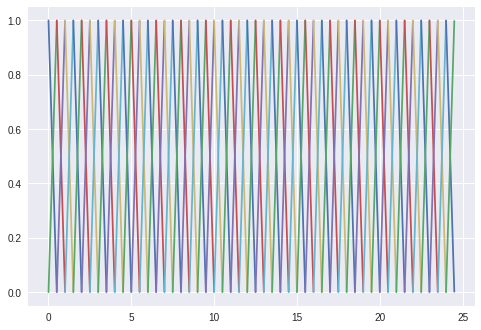

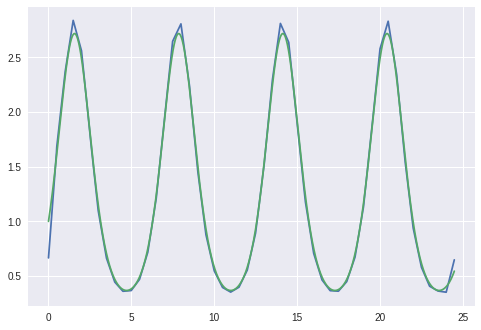

In [5]:
def printBasis(grid, bas):
  plt.figure()
  
  for i in range(0,len(grid)-1):
    inter= np.arange(grid[i],grid[i+1],0.001)
    elem= bas[i]
    t0= elem[0]
    t1= elem[1]
    val0= [t0[0]*x+t0[1] for x in inter]
    val1= [t1[0]*x+t1[1] for x in inter]
    
    plt.plot(inter,val0, inter, val1)
  
  plt.show()

def fun(x):
  return np.e**(np.sin(x))
  
mesh= [x/2 for x in range(0,50)]


printBasis(mesh,basis1D(mesh))

M, b, alpha, proj= l2projection1D(fun, mesh)


plt.figure()
interval= np.arange(mesh[0],mesh[-1], 0.01)
interval.resize(len(proj),1)

plt.plot(interval,proj)
plt.plot(interval, [fun(x) for x in interval])
plt.show()


## Extra assignment


###3. Function: quadrature over a reference triangle 

In [0]:
def quadRTriangle(fun):
  return fun(1/3,1/3)*1/2

###4. Function: L2 projection to pw linear approximation over triangular mesh in 2D

Input: function f(x), triangular mesh data structure with nodes (x0,...,xn)

Output: vector of L2 projection of f(x) evaluated in (x0,...,xn) 

Test: verify accuracy and convergence rate against exact function




$
\begin{cases}
  \lambda_{0}(x,y) = 1- x - y \\
  \lambda_{1}(x,y)= x \\
  \lambda_{2}(x,y)= y
\end{cases}
$

In [0]:
def createMesh(Nx,Ny):
  hx= 1.0 / (Nx-1)
  hy= 1.0 / (Ny-1)
  
  x = np.zeros((Nx*Ny))
  y = np.zeros((Nx*Ny))
  for i in range(Nx):
    for j in range(Ny):
      x[i*Nx + j] = j*hx
      y[i*Nx + j] = i*hy

  # Generate a mesh from the point cloud using a Delaunay algorithm
  mesh = tri.Triangulation(x,y)
  
  return mesh

def basis2D(mesh):
  def localLagrangeBasis(x0,x1,x2,index):
    z= np.zeros((3,1))
    z[index]= 1
    
    matrix= [[x0[0], x0[1], 1],
             [x1[0], x1[1], 1],
             [x2[0], x2[1], 1]]
    
    matrix= np.array(matrix)
    
    coeff, _, _, _ = lalg.lstsq(matrix,z,rcond= None)
    
    for i in [0,1,2]:
      if np.isclose(coeff[i],0):
        coeff[i]= 0
    
    return coeff.flatten()
  
  phi= []
  vertices= np.array([mesh.x, mesh.y])
  triangles= mesh.triangles
  
  for i in range(0,triangles.shape[0]):
    x0= vertices[0,triangles[i,0]], vertices[1,triangles[i,0]]
    x1= vertices[0,triangles[i,1]], vertices[1,triangles[i,1]]
    x2= vertices[0,triangles[i,2]], vertices[1,triangles[i,2]]
    
    t0= localLagrangeBasis(x0,x1,x2,0).T
    t1= localLagrangeBasis(x0,x1,x2,1).T
    t2= localLagrangeBasis(x0,x1,x2,2).T
    
    phi.append([t0, t1, t2])
  
  return phi


def l2projection2D(fun,mesh):
  return

In [53]:
bb= basis2D(createMesh(5,5)) 
for k in bb:
  print(k)
  


[array([-4., -4.,  1.]), array([4., 0., 0.]), array([0., 4., 0.])]
[array([-4.,  0.,  1.]), array([ 0., -4.,  1.]), array([ 4.,  4., -1.])]
[array([0., 4., 0.]), array([-4.,  0.,  4.]), array([ 4., -4., -3.])]
[array([-4.,  4.,  3.]), array([ 0., -4.,  1.]), array([ 4.,  0., -3.])]
[array([-4.,  4.,  1.]), array([ 0., -4.,  1.]), array([ 4.,  0., -1.])]
[array([0., 4., 0.]), array([-4.,  0.,  2.]), array([ 4., -4., -1.])]
[array([-4.,  0.,  3.]), array([ 0., -4.,  1.]), array([ 4.,  4., -3.])]
[array([-4., -4.,  3.]), array([ 4.,  0., -2.]), array([0., 4., 0.])]
[array([-4.,  4., -3.]), array([ 0., -4.,  4.]), array([4., 0., 0.])]
[array([ 0.,  4., -3.]), array([-4.,  0.,  1.]), array([ 4., -4.,  3.])]
[array([-4., -4.,  3.]), array([ 4.,  0., -1.]), array([ 0.,  4., -1.])]
[array([-4.,  0.,  2.]), array([ 0., -4.,  2.]), array([ 4.,  4., -3.])]
[array([ 0.,  4., -1.]), array([-4.,  0.,  1.]), array([ 4., -4.,  1.])]
[array([-4.,  4., -1.]), array([ 0., -4.,  2.]), array([4., 0., 0.])]

# **Results**

Present the results. If the result is an algorithm that you have described under the *Methods* section, you can present the data from verification and performance tests in this section. If the result is the output from a computational experiment this is where you present a selection of that data. 

# **Discussion**

Summarize your results and your conclusions. Were the results expected or surprising. Do your results have implications outside the particular problem investigated in this report? 

#References

In this appendix some examples are given to express and visualizing mathematical concepts such as vectors, matrices, meshes and functions. 

This is not part of the template report for the course.